<a href="https://colab.research.google.com/github/jeongna/project-python/blob/main/iamge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글 드라이브 연결

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
!pip install dlib

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2023-12-16 01:37:26--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.1’

shape_predictor_68_ 100%[===================>]  61.07M   131MB/s    in 0.5s    

2023-12-16 01:37:26 (131 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.1’ saved [64040097/64040097]



In [ ]:
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import dlib
import numpy as np

# Dlib의 얼굴 인식기와 특징점 모델 로드
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_face_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        landmarks = predictor(gray, face)
        return np.array([[p.x, p.y] for p in landmarks.parts()])
    return None

def average_landmarks(images):
    all_landmarks = [get_face_landmarks(image) for image in images]
    return np.mean(all_landmarks, axis=0)

def align_and_blend_faces(images):
    avg_landmarks = average_landmarks(images)

    aligned_faces = []
    for image in images:
        landmarks = get_face_landmarks(image)
        transformation_matrix = cv2.estimateAffinePartial2D(landmarks, avg_landmarks)[0]
        aligned_face = cv2.warpAffine(image, transformation_matrix, (images[0].shape[1], images[0].shape[0]))
        aligned_faces.append(aligned_face)

    # 모든 정렬된 얼굴을 평균화
    blended_face = np.mean(aligned_faces, axis=0).astype(np.uint8)
    return blended_face

In [ ]:
# 공통 경로 정의
base_path = '/gdrive/My Drive/project_image/'

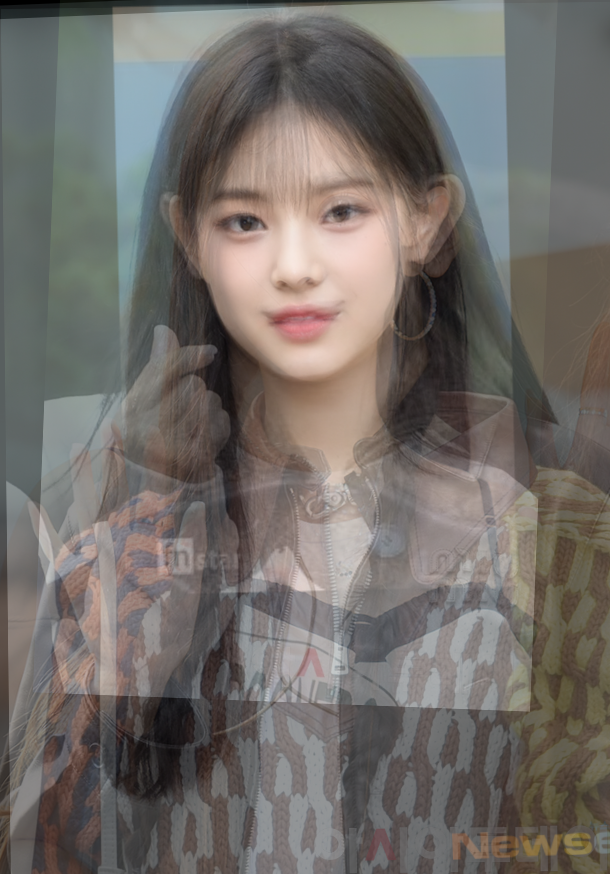

In [ ]:
# image1 (Newjeans)
image_files1 = ['image1_1.jpg', 'image1_2.jpg', 'image1_3.jpg', 'image1_4.jpg', 'image1_5.jpg']
images1 = [cv2.imread(base_path + filename) for filename in image_files1]

# 얼굴 합성
combined_face1 = align_and_blend_faces(images1)

cv2_imshow(combined_face1)

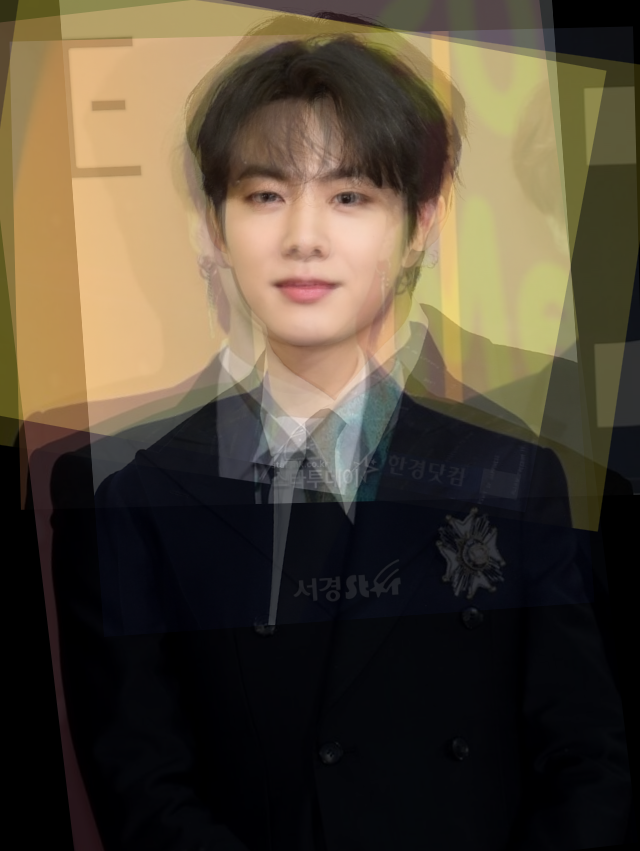

In [ ]:
## image2 (BTS)

image_files2 = ['image2_1.jpg', 'image2_2.jpg', 'image2_3.jpg', 'image2_4.jpg', 'image2_5.jpg']
images2 = [cv2.imread(base_path + filename) for filename in image_files2]

# 얼굴 합성
combined_face2 = align_and_blend_faces(images2)

cv2_imshow(combined_face2)

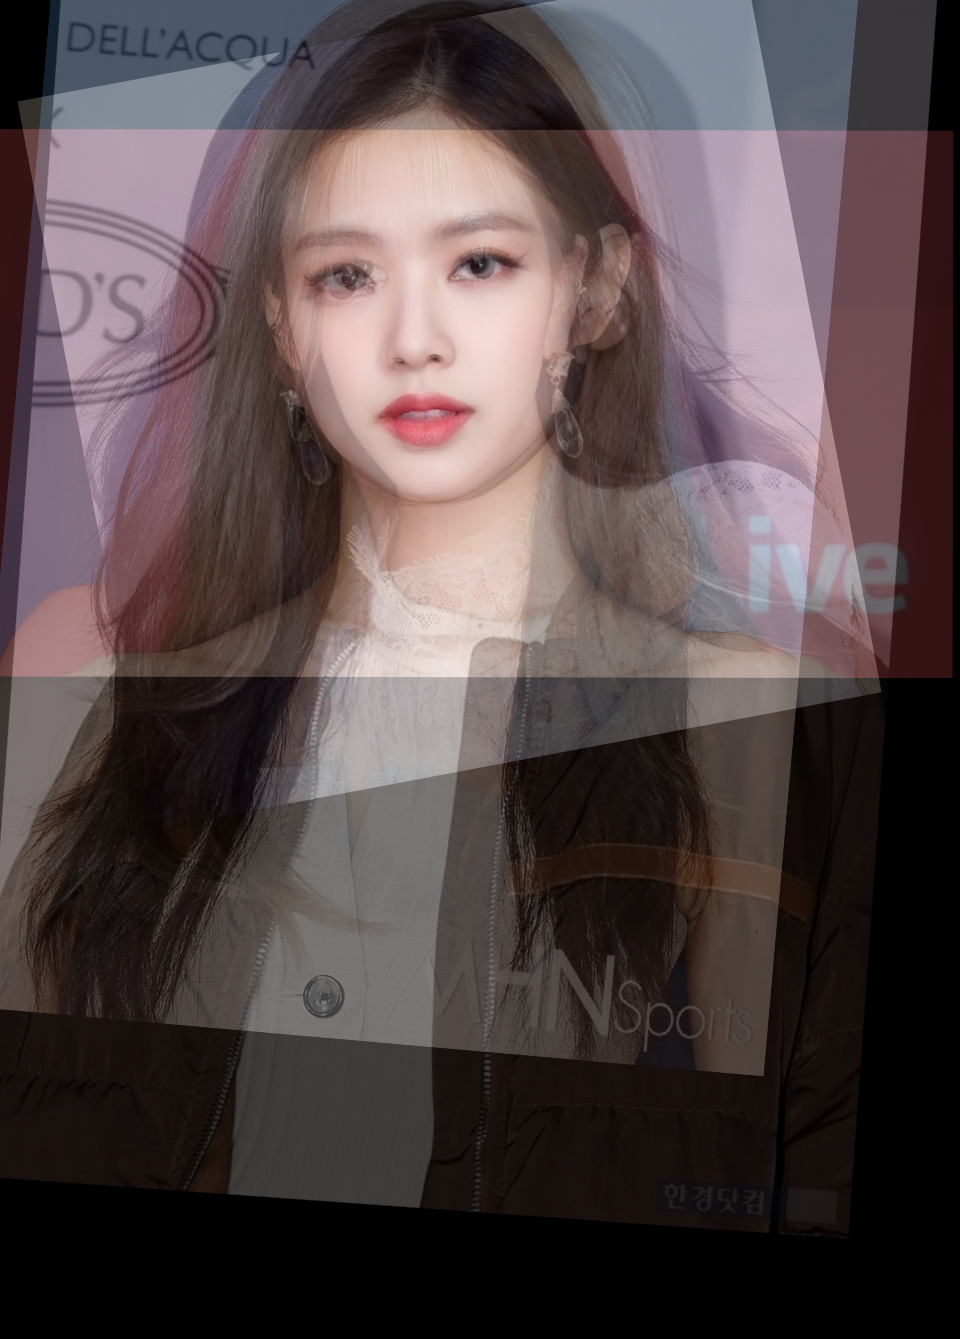

In [ ]:
## image3 (BlackPink)

image_files3 = ['image3_1.jpg', 'image3_2.jpg', 'image3_3.jpg', 'image3_4.jpg']
images3 = [cv2.imread(base_path + filename) for filename in image_files3]

# 얼굴 합성
combined_face3 = align_and_blend_faces(images3)

cv2_imshow(combined_face3)

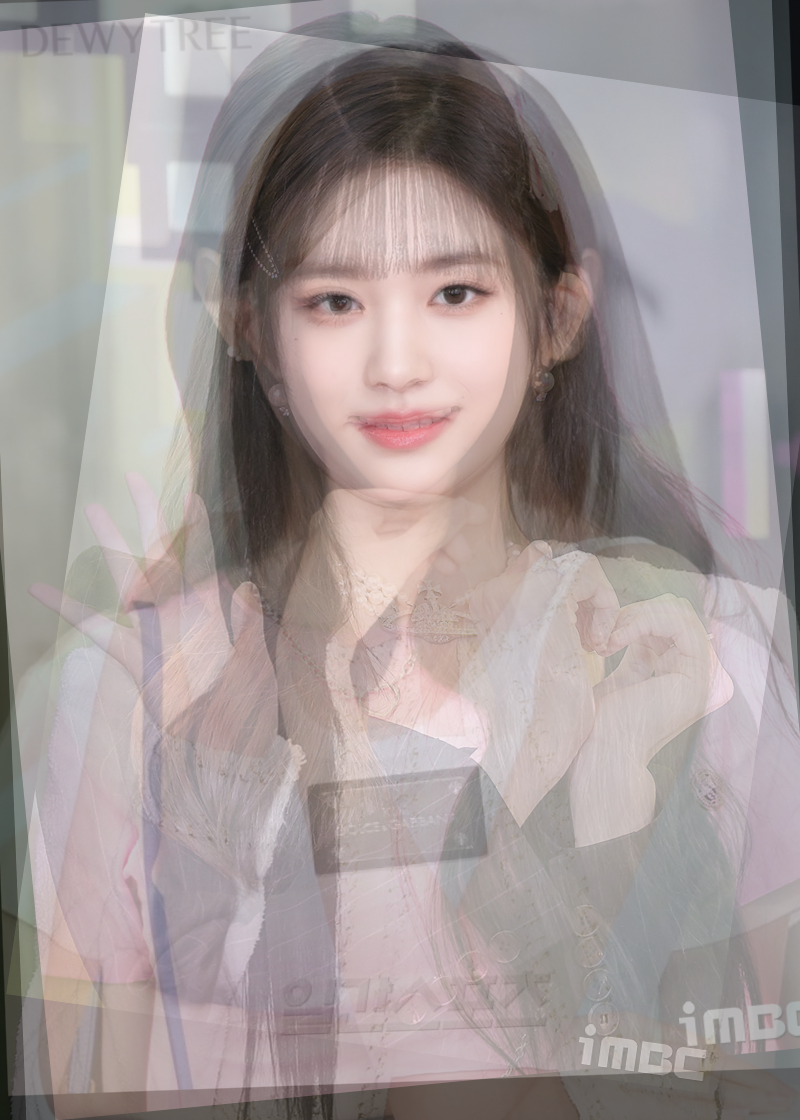

In [ ]:
## image4 (Ive)

image_files4 = ['image4_1.jpg', 'image4_2.jpg', 'image4_3.jpg','image4_4.jpg','image4_5.jpg']
images4 = [cv2.imread(base_path + filename) for filename in image_files4]

# 얼굴 합성
combined_face4 = align_and_blend_faces(images4)

cv2_imshow(combined_face4)

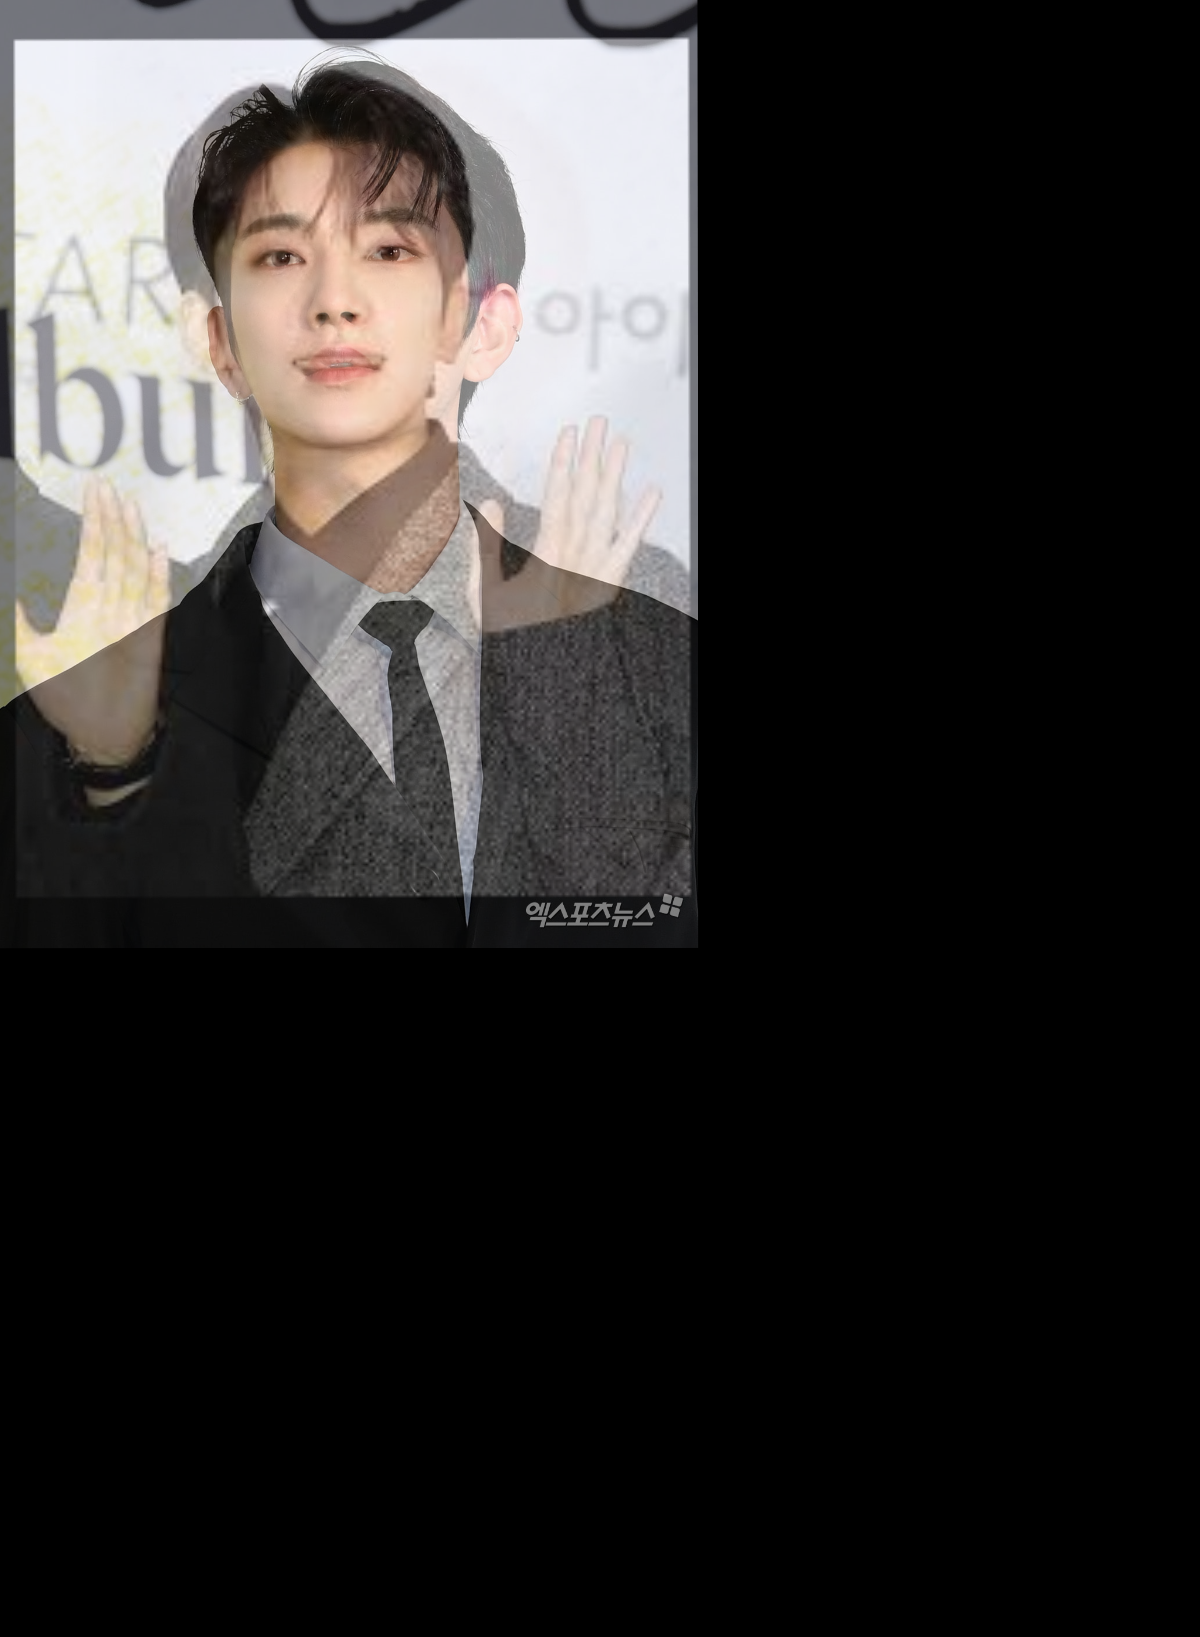

In [85]:
## image5 (세븐틴)

image_files5 = ['image5_1.jpg','image5_2.jpg','image5_3.jpg','image5_4.jpg','image5_5.jpg','image5_6.jpg']
images5 = [cv2.imread(base_path + filename) for filename in image_files5]

# 얼굴 합성
combined_face10 = align_and_blend_faces(images5)

cv2_imshow(combined_face5)

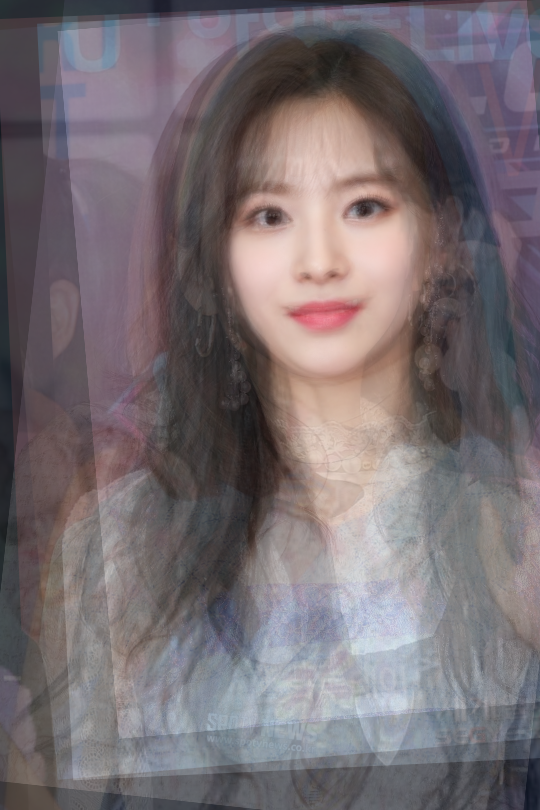

In [91]:
## image6 (Twice)

image_files6 = ['image6_1.jpg','image6_2.jpg','image6_3.jpg','image6_4.jpg','image6_5.jpg','image6_6.jpg','image6_7.jpg','image6_8.jpg']
images6 = [cv2.imread(base_path + filename) for filename in image_files6]

# 얼굴 합성
combined_face6 = align_and_blend_faces(images6)

cv2_imshow(combined_face6)

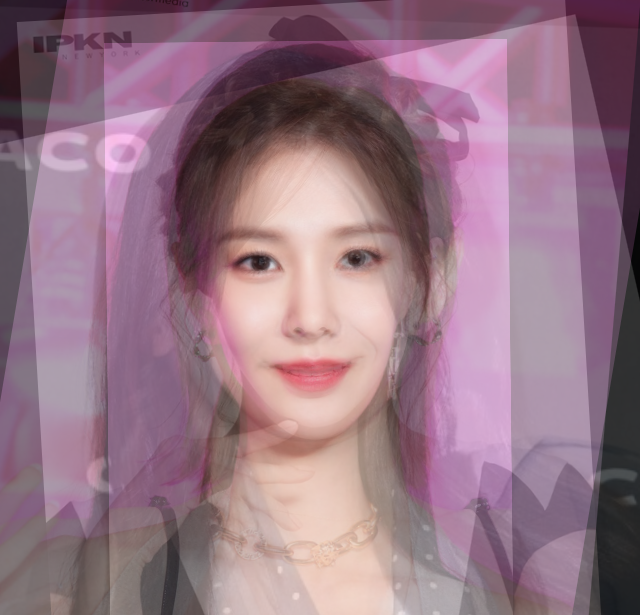

In [84]:
## image10 (소녀시대)

image_files10 = ['image10_1.jpg','image10_2.jpg','image10_3.jpg','image10_4.jpg','image10_5.jpg','image10_6.jpg']
images10 = [cv2.imread(base_path + filename) for filename in image_files10]

# 얼굴 합성
combined_face10 = align_and_blend_faces(images10)

cv2_imshow(combined_face10)

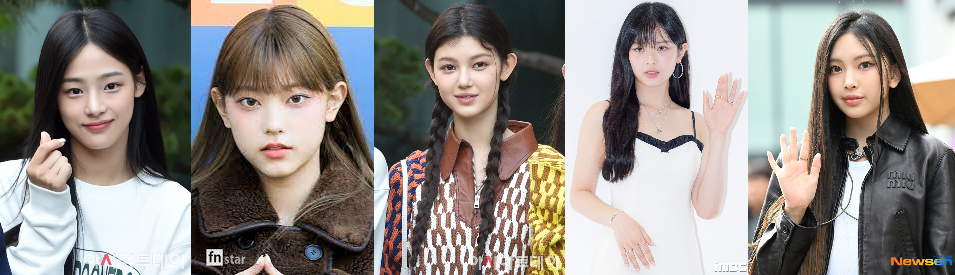

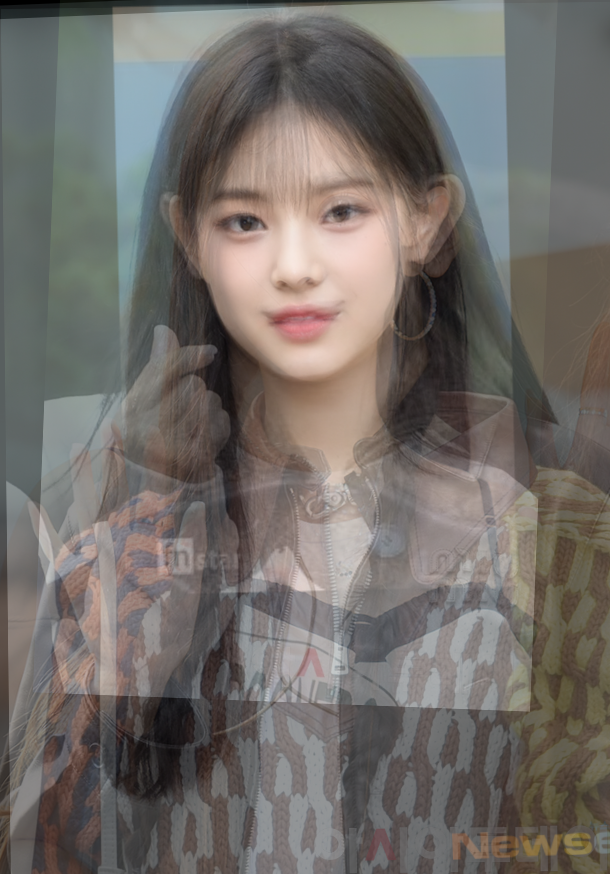

In [ ]:
from google.colab.patches import cv2_imshow

def display_images_sequentially(original, images, display_time=1000):
    # 이미지 높이 조정
    resized_images = resize_images_to_same_height(images)

    # 조정된 이미지를 수평으로 결합
    combined = np.hstack(resized_images)

    # 결합된 이미지를 일정 시간 동안 표시
    cv2_imshow(combined)
    cv2.waitKey(display_time)  # 밀리초 단위로 시간 지정

    # 원래 합성된 얼굴 이미지로 돌아가기
    cv2_imshow(original)
    cv2.waitKey(0)

# 함수 호출
display_images_sequentially(combined_face, images1)
